### STAT 201 Group 8 Project Proposal:
## Comparing the Mean Differences of Weekly Step Count for Male vs Female University Students

### Introduction:

A post-pandemic world has brought about an alarming increase in obesity rates, detrimental mental health issues, and overall enhanced sedentary behavior; however, physical exercise, such as walking, has been found to alleviate anxiety, while also increasing exercise tolerance and energy levels (Sharma, 2006). An accessible and measurable tool to calculate step counts is with our phones; almost all phones embed the ‘Health’ application, which tracks one’s daily steps. With men and women exhibiting different leisure and exercise habits, we were interested in studying if a discrepancy existed in their walking habits, and how active they each were. Studies have shown that men tend to be more active than women, due to social & personal factors (Azevedo, 2007), however, we wanted to examine this more specifically on university students.
With our project, we are trying to observe if average weekly footcount steps are different between genders. Our variables of interest are gender, and footstep counts. We will be looking at mean weekly footstep counts. We will be using data that was recorded by our phones and watches(fitbit) and our sample will be from university students. 
Our dataset will be comprised of the raw daily step counts of 4 female and 5 male students, dispersed over the course of 2 weeks. The dataset will be organized into an excel sheet, with our variable of interest being daily step counts, spread across 2 categories of gender (male/female). The location parameter of interest is the difference in mean step counts between genders, and we will also calculate the standard deviation to understand the role of sampling variation in our experiment.
##### Research question: Is there a difference between the mean weekly step count of men ($\mu_m$) vs women ($\mu_w$)?
##### Null Hypothesis: $\mu_m - \mu_w$ = 0
##### Alternative Hypothesis: $\mu_m - \mu_w$ ≠ 0
If our results show that there is a difference between footcounts between genders, we can show this data to our stakeholders to prove that we should focus on the lesser footcount gender first with exercise/physical activity initiatives specific for that gender to make more of an impact. 


### Preliminary Results

Demonstrate that the dataset can be read from the web into R.
Clean and wrangle your data into a tidy format.
Plot the relevant raw data, tailoring your plot in a way that addresses your question.
Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your plot.


In [3]:
# Run this cell before continuing. 
library(cowplot)
library(dplyr)
library(gridExtra)
library(tidyverse)
library(repr)
library(infer)
library(repr)
source("tests_tutorial_01.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests_tutorial_01.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


Reading in the data and tidying

In [28]:
stepcount_data <- read_csv("https://raw.githubusercontent.com/Jellia1225/STAT201-Group-8-Foot-Step-Project/87d7bed3c70f2afb2cc10c14a852019310c33208/STAT201%20Dataset%20for%20Foot%20Steps%20Group%208.csv")
head(stepcount_data)

stepcount <- stepcount_data %>%
select(Gender:Steps_3.12)

colnames(stepcount) <- c("gender", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14")

stepcount <- stepcount %>%
pivot_longer(!gender, names_to = "day", values_to = "stepcount")
head(stepcount_tidy)

Rows: 10 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Name, Gender
dbl (14): Steps_2.27, Steps_2.28, Steps_3.1, Steps_3.2, Steps_3.3, Steps_3.4...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name,Gender,Steps_2.27,Steps_2.28,Steps_3.1,Steps_3.2,Steps_3.3,Steps_3.4,Steps_3.5,Steps_3.6,Steps_3.7,Steps_3.8,Steps_3.9,Steps_3.10,Steps_3.11,Steps_3.12
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Gabriella,F,10536,8684,6633,5526,2842,10923,7124,10229,8537,7699,7116,8226,5665,5492
Yoki,F,6378,2431,5212,6232,2241,7334,1332,11720,4775,9025,8127,3411,3004,5302
Mary,F,9648,8035,9436,13271,7118,3449,5254,8633,8845,8305,6584,13099,19000,10312
Ars,M,10337,1545,9631,5877,6189,8576,5552,7716,8174,9732,5736,9312,6850,2320
Anna,F,4472,6361,1443,3842,2362,1075,180,2250,6787,1208,4178,1292,297,252
Alex,M,2269,3779,7078,4584,4217,10310,8672,8802,10217,6578,6759,9503,7343,8465


gender,day,stepcount
<chr>,<chr>,<dbl>
F,1,10536
F,2,8684
F,3,6633
F,4,5526
F,5,2842
F,6,10923


Obtaining estimates

In [51]:
estimates <- stepcount %>%
    group_by(gender) %>%
    summarise(mean_stepcount = mean(stepcount))
estimates

gender,mean_stepcount
<chr>,<dbl>
F,7198.314
M,7330.414


Plotting the data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


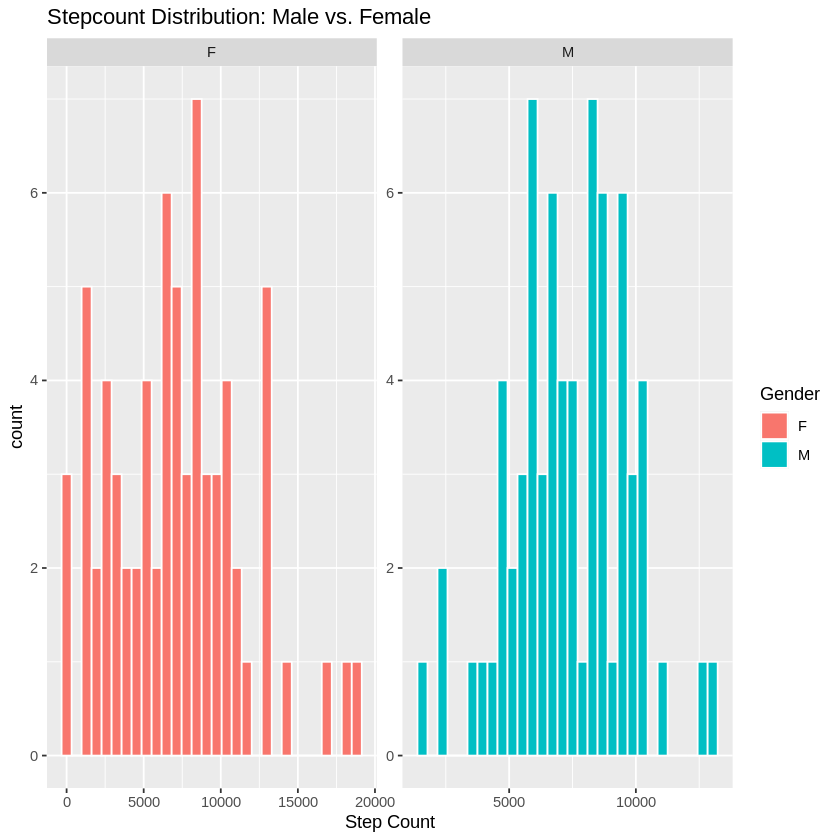

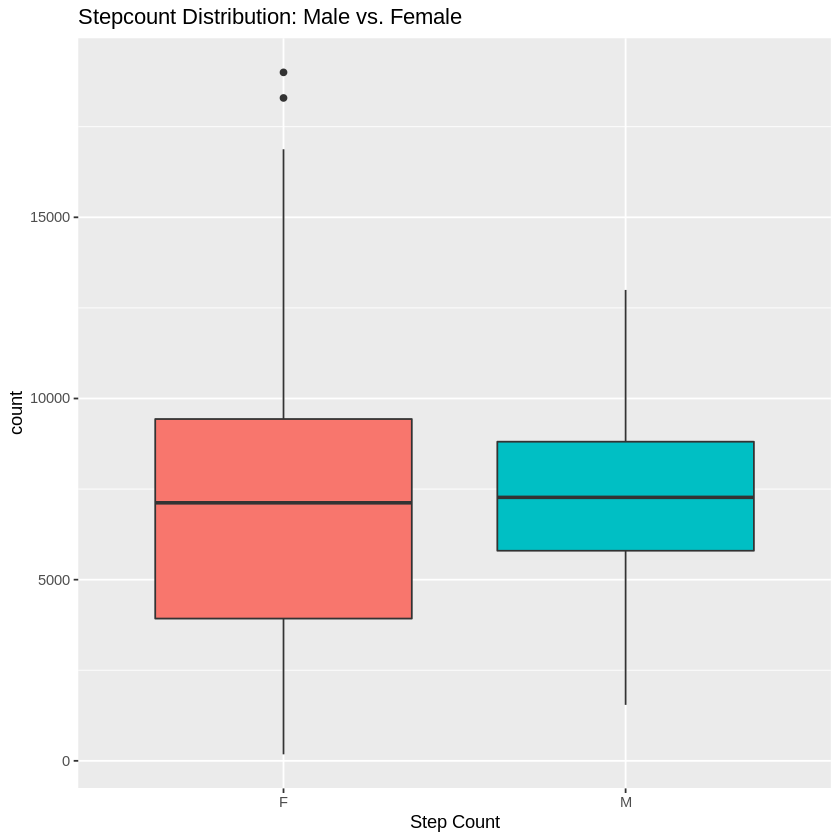

In [48]:
stepcount_plot_dist <- stepcount %>%
    ggplot() + 
    geom_histogram(aes(stepcount, fill=gender), color='white') + 
    facet_wrap(~gender, scales = "free") +
    labs(x = "Step Count", fill = "Gender") +
    ggtitle("Stepcount Distribution: Male vs. Female")
stepcount_plot_dist

stepcount_plot_box <- stepcount %>%
    ggplot() +
geom_boxplot(aes(x = gender, stepcount, fill = gender)) +
    ggtitle("Stepcount Distribution: Male vs. Female") + 
    xlab("Step Count") + 
    ylab("count") + 
    guides(fill = FALSE)
stepcount_plot_box

### Methods: Plan

!!!actual plan

Our chosen sample population is technologically reliant; they carry their phones with them most of the time, and these devices are advanced enough to record step data with accuracy and precision.
However, there are some limitations; our sample is made of our group members, and our friends; we chose people who exhibit similar habits to us, likely study similar majors (different classes require different walking distances), and overall, our sample was not random and not generalizable to all university students. While our sample size was 126, we only took captured data from 9 people - as humans, we tend to follow routines and consistent patterns, meaning there would be less variation in our sample, as there would have been if we took one observation from 126 people. Our sample is quite biased, towards our group members & our friends, but this stems from needing private data, and only having a limited reach of people.

### References


Azevedo, M. R., Araújo, C. L., Reichert, F. F., Siqueira, F. V., da Silva, M. C., &amp; Hallal, P. C. (2007). Gender differences in leisure-time physical activity. International Journal of Public Health, 52(1), 8–15. https://doi.org/10.1007/s00038-006-5062-1 

Sharma, A. (2006). Exercise for mental health. The Primary Care Companion For CNS Disorders, 8(2). https://doi.org/10.4088/pcc.v08n0208a